 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [107]:
import numpy as np
import pandas as pd

In [108]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [109]:
# mostramos la estructura del dataframe : head
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [110]:
#Analizamos que variables no ayudan y lo eliminamos: ssc_b','hsc_b','hsc_s','degree_t','salary
#Código aquí
df = df.drop(['ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'salary'], axis=1)
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


In [111]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [112]:
#Contar los registros
df.count()

sl_no             215
gender            215
ssc_p             215
hsc_p             215
degree_p          215
workex            215
etest_p           215
specialisation    215
mba_p             215
status            215
dtype: int64

## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [113]:
# codifica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida

In [114]:
valores_unicos = df['gender'].unique()
print(valores_unicos)

['M' 'F']


In [115]:
valores_unicos = df['workex'].unique()
print(valores_unicos)

['No' 'Yes']


In [116]:
valores_unicos = df['status'].unique()
print(valores_unicos)

['Placed' 'Not Placed']


In [117]:
valores_unicos = df['specialisation'].unique()
print(valores_unicos)

['Mkt&HR' 'Mkt&Fin']


In [118]:
# Para Genero
df['gender'] = df['gender'].map({'M': 0, 'F': 1})

# Para workex
df['workex'] = df['workex'].map({'No': 0, 'Yes': 1})

# Para status
df['status'] = df['status'].map({'Not Placed': 0, 'Placed': 1})

# Para specialisation
df['specialisation'] = df['specialisation'].map({'Mkt&HR': 0, 'Mkt&Fin': 1})

In [119]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


In [120]:
#Eliminar datos faltantes
df.dropna(inplace=True)
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1


# Balance Dataset


In [121]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [122]:
from sklearn.utils import resample

# Separar la clase minoritaria de la clase mayoritaria
mayority_class = df[df['status'] == 1]
minority_class = df[df['status'] == 0]

# Adicionar elementos de la clase minoritaria
minority_class_resampled = resample(minority_class, replace=True, n_samples=len(mayority_class), random_state=42)

# Combinar clases mayoritarias y clases minoritarias en la variable balanced_data
balanced_data = pd.concat([mayority_class, minority_class_resampled])

In [123]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64

In [124]:
balanced_data.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80,1
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50,1
7,8,0,82.00,64.00,66.00,1,67.0,1,62.14,1


In [125]:
balanced_data.shape

(296, 10)

# Train Test Split

In [126]:
# Separación de feature y target
X = balanced_data.copy().drop('status', axis=1)
y = balanced_data['status']
y.head(4)

0    1
1    1
2    1
4    1
Name: status, dtype: int64

In [127]:
X.head(4)

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
0,1,0,67.00,91.00,58.00,0,55.0,0,58.80
1,2,0,79.33,78.33,77.48,1,86.5,1,66.28
2,3,0,65.00,68.00,64.00,0,75.0,1,57.80
4,5,0,85.80,73.60,73.30,0,96.8,1,55.50


In [128]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [129]:
X_train.head(4)

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p
101,102,0,63.0,72.0,68.0,0,78.00,0,60.44
158,159,0,67.0,63.0,64.0,0,60.00,1,61.87
65,66,0,54.0,47.0,57.0,0,89.69,0,57.10
180,181,0,65.0,71.5,62.8,1,57.00,1,56.60


# Feature Scaling

In [130]:
# scalar las características de x_train y x_test
from sklearn.preprocessing import MinMaxScaler
# Puedes usar esta celda como punto de partida
sc = MinMaxScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_train_scaled

array([[0.4741784 , 0.        , 0.45454545, ..., 0.58333333, 0.        ,
        0.34595202],
       [0.74178404, 0.        , 0.53719008, ..., 0.20833333, 1.        ,
        0.39955022],
       [0.30516432, 0.        , 0.26859504, ..., 0.826875  , 0.        ,
        0.22076462],
       ...,
       [0.69014085, 0.        , 0.59917355, ..., 0.6875    , 1.        ,
        0.41491754],
       [0.91079812, 0.        , 0.22727273, ..., 0.1875    , 1.        ,
        0.50712144],
       [0.66666667, 0.        , 0.90909091, ..., 0.20833333, 1.        ,
        0.37781109]])

# 1 k-nearest neighbor

Classification Report 

              precision    recall  f1-score   support

           0       0.83      0.97      0.89        39
           1       0.98      0.84      0.90        50

    accuracy                           0.90        89
   macro avg       0.90      0.91      0.90        89
weighted avg       0.91      0.90      0.90        89



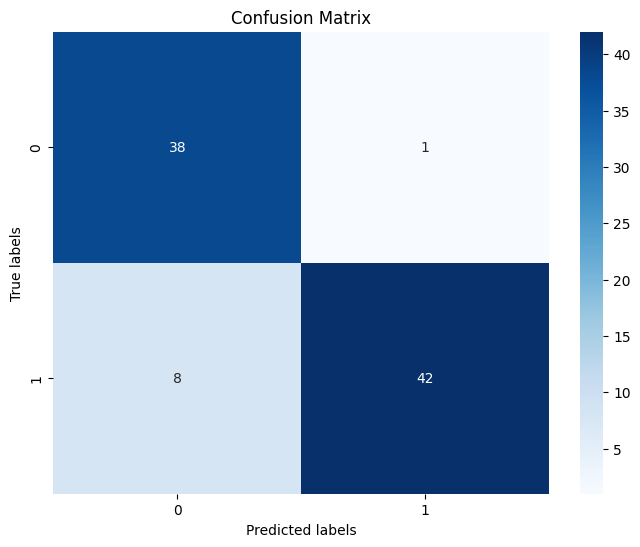

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear y entrenar el clasificador KNN
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # Selecciona el número de vecinos
knn_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = knn_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión heatmap KNN
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

Classification Report 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        39
           1       0.91      0.98      0.94        50

    accuracy                           0.93        89
   macro avg       0.94      0.93      0.93        89
weighted avg       0.94      0.93      0.93        89



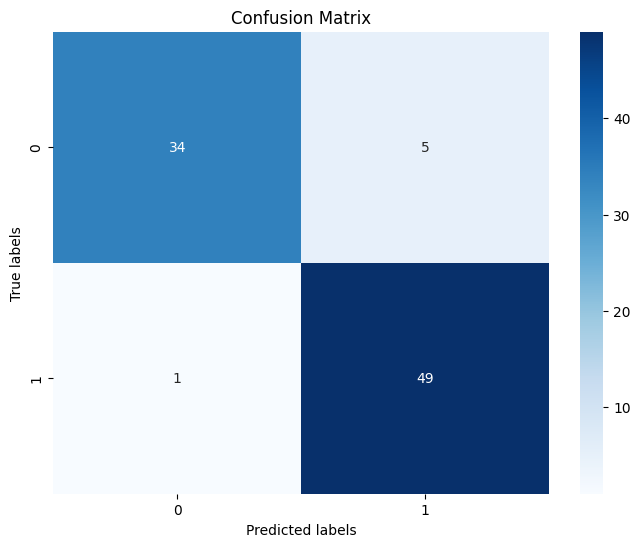

In [132]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el clasificador del árbol de decisión
dtree_classifier = DecisionTreeClassifier(random_state=42)
dtree_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = dtree_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# SVM

Classification Report 

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        39
           1       0.88      0.74      0.80        50

    accuracy                           0.80        89
   macro avg       0.80      0.81      0.80        89
weighted avg       0.81      0.80      0.80        89



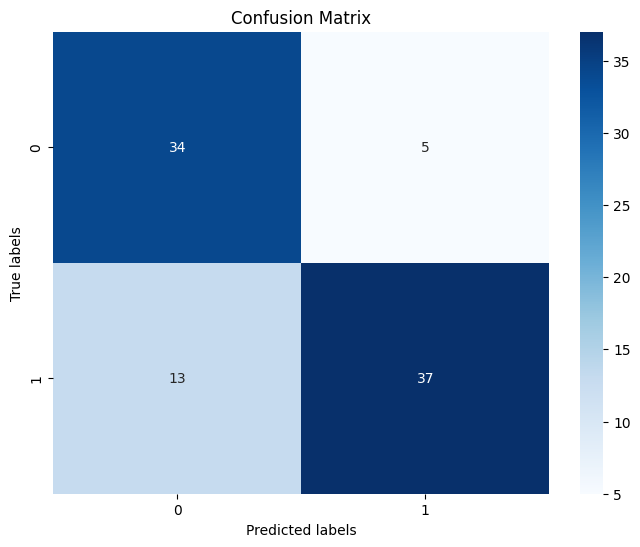

In [133]:
# Support Vector Machine
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = svm_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

Classification Report 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        39
           1       0.98      0.86      0.91        50

    accuracy                           0.91        89
   macro avg       0.91      0.92      0.91        89
weighted avg       0.92      0.91      0.91        89



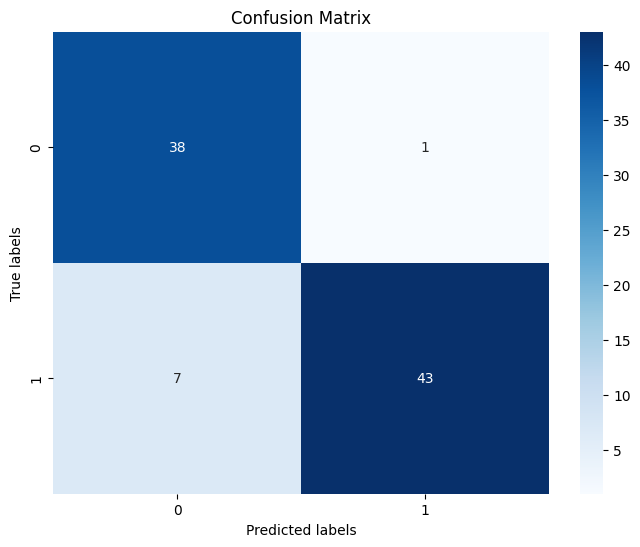

In [134]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)
rf_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = rf_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Gaussian Naive Bayes

Classification Report 

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        39
           1       0.82      0.74      0.78        50

    accuracy                           0.76        89
   macro avg       0.76      0.77      0.76        89
weighted avg       0.77      0.76      0.76        89



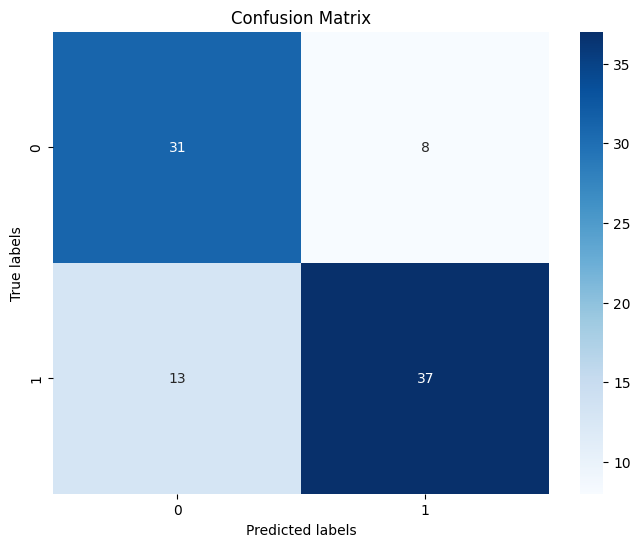

In [135]:
from sklearn.naive_bayes import GaussianNB
# Crear y entrenar el clasificador Gaussian Naive Bayes
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = gnb_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

Classification Report 

              precision    recall  f1-score   support

           0       0.75      0.85      0.80        39
           1       0.87      0.78      0.82        50

    accuracy                           0.81        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.82      0.81      0.81        89



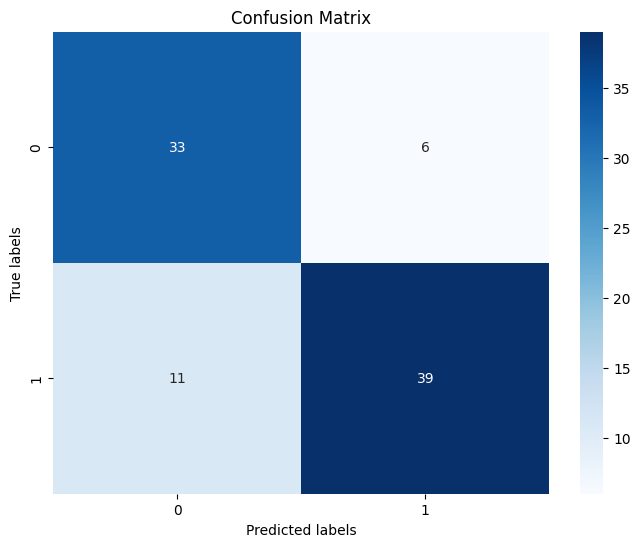

In [136]:
from sklearn.linear_model import LogisticRegression

logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train_scaled, Y_train)

# Predecir en el conjunto de prueba
Y_pred = logistic_classifier.predict(X_test_scaled)

# Imprimir un informe de clasificación
print("Classification Report \n")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(Y_test, Y_pred) #Generar matriz

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Single Input Predictions

Test si está prediciendo adecuadamente

In [137]:
print("Clase Predicha",dtree_classifier.predict(X_test_scaled[20].reshape(1,-1))[0])
print("Clase Real", Y_test.iloc[20])

Clase Predicha 1
Clase Real 1


In [138]:
resultados = []

for i in range(len(Y_test)):
    clase_predicha = dtree_classifier.predict(X_test_scaled[i].reshape(1, -1))[0]
    clase_real = Y_test.iloc[i]
    resultados.append((clase_predicha, clase_real))

print(resultados)


[(0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1)]


# Sistema de Predicción

In [139]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    features = np.array([[sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p]])
    #print(features)
    scaler_features = sc.fit_transform(features)
    #print(scaler_features)
    prediction = rf_classifier.predict(scaler_features).reshape(1,-1)
    #print(prediction)
    return prediction[0]

In [140]:
sl_no = 11
gender = "M"
ssc_p = 58.0
hsc_p = 61.0
degree_p = 60.0
workex = "Yes"
etest_p = 62.0
specialisation = "Mkt&Fin"
mba_p = 60.85

# Convertir variables categóricas a valores numéricos
gender_numeric = 1 if gender == 'F' else 0
workex_numeric = 1 if workex == 'Yes' else 0
specialisation_numeric = 1 if specialisation == 'Mkt&Fin' else 0

result = prediction(sl_no, gender_numeric, ssc_p, hsc_p, degree_p, workex_numeric, etest_p, specialisation_numeric, mba_p)

if result == 1:
    print('Candidato es Contratado')
else:
    print('Candidato No Contratado')


Candidato No Contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [141]:
import pickle

pickle.dump(dtree_classifier,open('J:/Education/Postgrado/C2024-I/CS8130_DataAnalyticsParaTomaDecisiones/DA_Semana06/model.pkl','wb'))
pickle.dump(sc,open('J:/Education/Postgrado/C2024-I/CS8130_DataAnalyticsParaTomaDecisiones/DA_Semana06/standscaler.pkl','wb'))